# Magnitude at 5 Sigma from background

In [1]:
# Check the version of MAF - the output should be version 2.4.2 or higher.
# 'unknown' means you're running from a git repo version,
# and have made changes to your local code

import lsst.sims.maf
lsst.sims.maf.__version__

'2.13.0.sims-59-g0a27faef'

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import our python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

# Config

In [4]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
colors = {'u': 'cyan', 'g': 'g', 'r': 'y','i': 'r', 'z': 'm', 'y': 'k'}
Nfilt=len(filters)

In [5]:
all_sqlconstraint=[]
all_bundlename1=[]
all_bundlename2=[]
for f in filters:
    sqlconstraint = 'filter = \"{}\"'.format(f)
    bundlename1    = 'bund1SBN_{}'.format(f) 
    bundlename2    = 'bund2SBN_{}'.format(f) 
    all_sqlconstraint.append(sqlconstraint)
    all_bundlename1.append(bundlename1)
    all_bundlename2.append(bundlename2)

In [6]:
all_sqlconstraint

['filter = "u"',
 'filter = "g"',
 'filter = "r"',
 'filter = "i"',
 'filter = "z"',
 'filter = "y"']

In [7]:
all_bundlename1

['bund1SBN_u',
 'bund1SBN_g',
 'bund1SBN_r',
 'bund1SBN_i',
 'bund1SBN_z',
 'bund1SBN_y']

In [8]:
all_bundlename2

['bund2SBN_u',
 'bund2SBN_g',
 'bund2SBN_r',
 'bund2SBN_i',
 'bund2SBN_z',
 'bund2SBN_y']

# Simu data

In [13]:
# Note the V3 for opening opsim version 3.x databases.
# Use V4 for more recent runs.

#opsdb = db.OpsimDatabase('baseline2018a.db')
opsdb = db.OpsimDatabase('/Users/dagoret/DATA/Cadence/baseline2018a.db')
outDir = 'output_skybrightnessandm5sigma'
resultsDb = db.ResultsDb(outDir=outDir)

# Metrics

In [10]:
# metric = the "maximum" of the "skybrightness" for each group of visits in the slicer
metric1 = metrics.MeanMetric('skyBrightness')
metric2 = metrics.MeanMetric('fiveSigmaDepth')

summaryMetrics = [metrics.MinMetric(), metrics.MedianMetric(),
                  metrics.MaxMetric(), metrics.RmsMetric()]


# slicer = a grouping or subdivision of visits for the simulated survey
# based on their position on the sky (using a Healpix grid)
#slicer1 = slicers.OneDSlicer(sliceColName='night', binsize=10)
slicer = slicers.OneDSlicer(sliceColName='night', binsize=1, binMin=0, binMax=365*10)


# Bundle

- Bundles dict for all filter

In [12]:
bundles = {}
for ifilt in np.arange(Nfilt):
    sqlconstraint = all_sqlconstraint[ifilt]
    bundlename1    = all_bundlename1[ifilt]
    bundlename2    = all_bundlename2[ifilt]
    bundles[bundlename1] = metricBundles.MetricBundle(metric1, slicer, sqlconstraint,summaryMetrics=summaryMetrics)
    bundles[bundlename2] = metricBundles.MetricBundle(metric2, slicer, sqlconstraint,summaryMetrics=summaryMetrics)
    
    
    print(bundles[bundlename1].dbCols)
    print(bundles[bundlename2].dbCols)

{'night', 'skyBrightness'}
{'fiveSigmaDepth', 'night'}
{'night', 'skyBrightness'}
{'fiveSigmaDepth', 'night'}
{'night', 'skyBrightness'}
{'fiveSigmaDepth', 'night'}
{'night', 'skyBrightness'}
{'fiveSigmaDepth', 'night'}
{'night', 'skyBrightness'}
{'fiveSigmaDepth', 'night'}
{'night', 'skyBrightness'}
{'fiveSigmaDepth', 'night'}


In [14]:
bgroup = metricBundles.MetricBundleGroup(bundles, opsdb, outDir=outDir, 
                                         resultsDb=resultsDb)

Querying database SummaryAllProps with constraint filter = "u" for columns ['fiveSigmaDepth', 'night', 'skyBrightness']
Found 177538 visits
Running:  ['bund1SBN_u', 'bund2SBN_u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "r" for columns ['fiveSigmaDepth', 'night', 'skyBrightness']
Found 515172 visits
Running:  ['bund1SBN_r', 'bund2SBN_r']
Completed metric generation.
Running reduce methods.
Running summary statistics.


/cvmfs/sw.lsst.eu/darwin-x86_64/lsst_sims/sims_w_2020_31/stack/miniconda3-py37_4.8.2-1a1d771/DarwinX86/sims_maf/2.13.0.sims-59-g0a27faef/python/lsst/sims/maf/slicers/oneDSlicer.py:74: UserWarning: Both binsize and bins have been set; Using binsize 1.000000 only.
  warnings.warn('Both binsize and bins have been set; Using binsize %f only.' %(self.binsize))


Completed.
Querying database SummaryAllProps with constraint filter = "i" for columns ['fiveSigmaDepth', 'night', 'skyBrightness']
Found 514481 visits
Running:  ['bund1SBN_i', 'bund2SBN_i']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "y" for columns ['fiveSigmaDepth', 'night', 'skyBrightness']
Found 445157 visits
Running:  ['bund1SBN_y', 'bund2SBN_y']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "g" for columns ['fiveSigmaDepth', 'night', 'skyBrightness']
Found 234144 visits
Running:  ['bund1SBN_g', 'bund2SBN_g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "z" for columns ['fiveSigmaDepth', 'night', 'skyBrightness']
Found 486208 visits
Running:  ['bund1SBN_z', 'bund2SBN_z

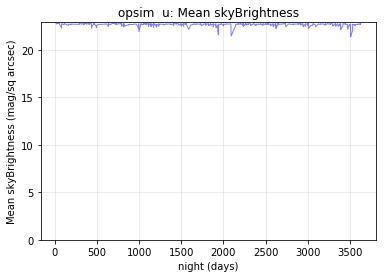

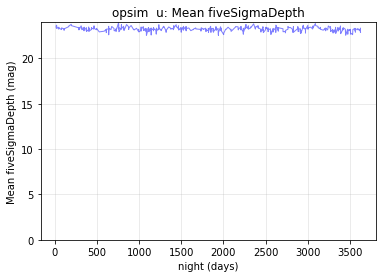

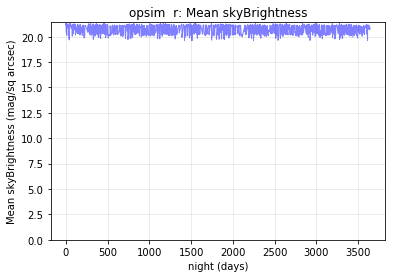

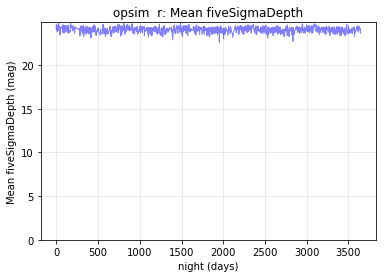

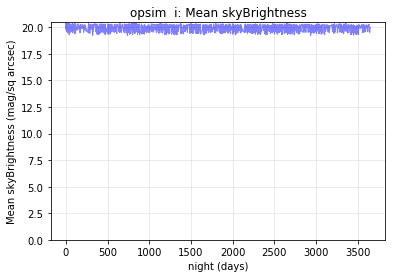

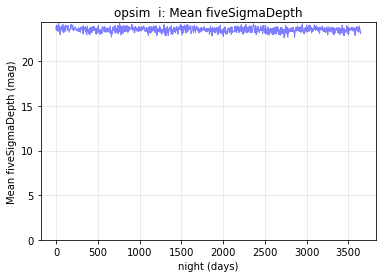

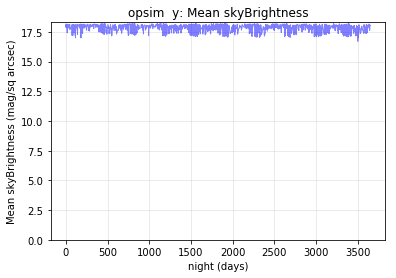

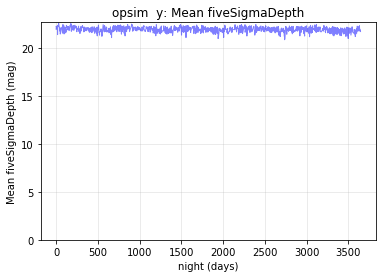

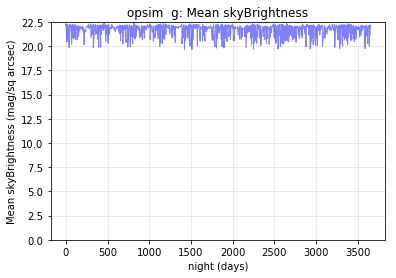

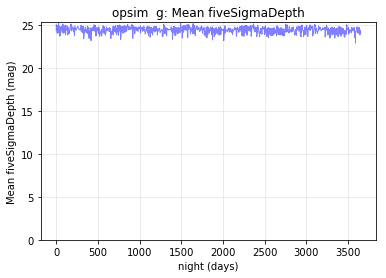

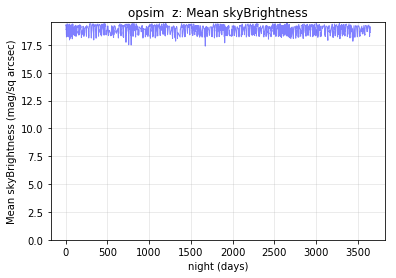

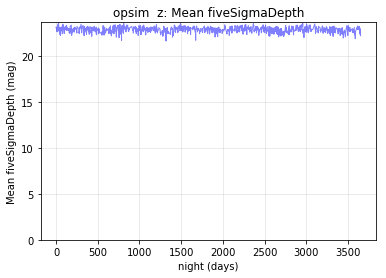

In [15]:
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [18]:
for ifilt in np.arange(Nfilt):
    
    bundlename1    = all_bundlename1[ifilt]

    print("===============================",filters[ifilt],"===============================")
    print(bundles[bundlename1].dbCols)
    print(len(bundles[bundlename1].metricValues))
    print(bundles[bundlename1].metricValues[0:50])
    print(bundles[bundlename1].summaryValues)
    

=============================== u ===============================
{'night', 'skyBrightness'}
3652
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 22.762751663868325 22.782665775135413 22.76431249420247 22.7631825290572
 22.79565936420261 22.776560797401448 22.78816650788193 -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
{'Min': 21.38228442656814, 'Median': 22.725246559687786, 'Max': 22.839132547146285, 'Rms': 0.14658229602622308}
=============================== g ===============================
{'night', 'skyBrightness'}
3660
[-- -- -- -- -- -- 22.127234389721522 22.32046052009684 -- --
 21.63873426888712 -- -- -- -- -- -- -- 20.44932788203679
 21.110416579919466 21.1411140430891 21.70514108588066 21.648055043740026
 21.902558606520554 22.118577339927235 22.264322104765256 --
 21.948164853099996 20.7652320007061 -- -- -- -- -- -- 22.051957731896994
 21.90404951126376 -- -- -- -- -- -- -- -- -- 19.839737449628934
 22.28498767365911 -- 22.12461522931

In [19]:
for ifilt in np.arange(Nfilt):
    
    bundlename2    = all_bundlename2[ifilt]

    print("===============================",filters[ifilt],"===============================")
    print(bundles[bundlename2].dbCols)
    print(len(bundles[bundlename2].metricValues))
    print(bundles[bundlename2].metricValues[0:50])
    print(bundles[bundlename2].summaryValues)
    

=============================== u ===============================
{'fiveSigmaDepth', 'night'}
3652
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 23.56914748936922 23.460240528448516 23.334532602455937
 23.428515799597896 23.33245869700431 23.648358520805864
 23.439315038805756 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- --]
{'Min': 22.516551546187703, 'Median': 23.21990458311481, 'Max': 23.89041721663851, 'Rms': 0.22355960691233134}
=============================== g ===============================
{'fiveSigmaDepth', 'night'}
3660
[-- -- -- -- -- -- 24.391281852345436 25.02061758137099 -- --
 24.71413834548461 -- -- -- -- -- -- -- 24.032689097050838
 24.302264002138173 24.312569847637025 24.650788383561167
 24.60201783742074 24.648842177289445 24.80133834998915 24.934820858443356
 -- 24.403837819115736 24.08554066818566 -- -- -- -- -- --
 25.173905336380223 24.92388640542584 -- -- -- -- -- -- -- -- --
 23.697908149764494 24.805418331794474 -- 24.62

Text(0.5, 1.0, 'Magnitude 5sigma')

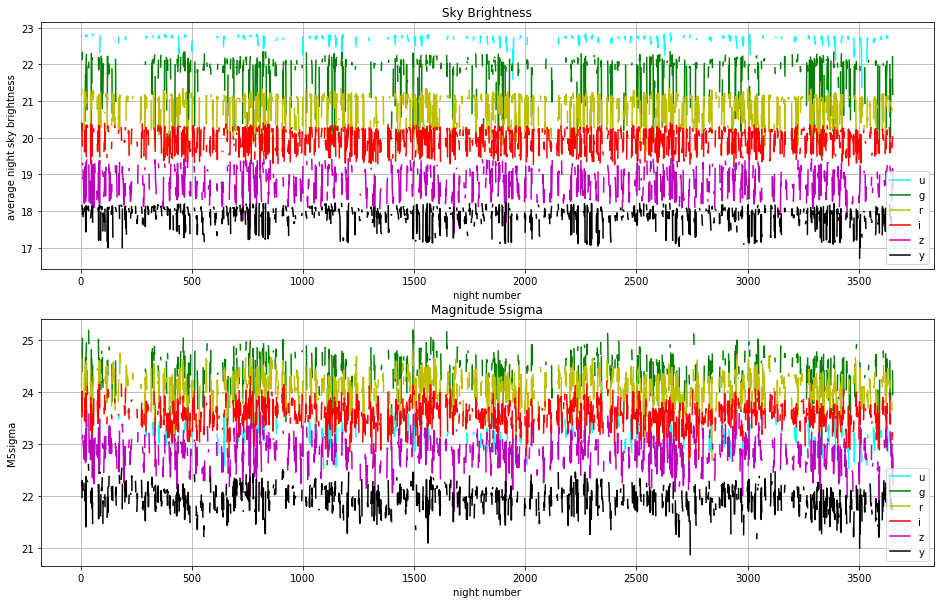

In [23]:
fig=plt.figure(figsize=(16,10))
ax1=fig.add_subplot(211)
for ifilt in np.arange(Nfilt):
    
    bundlename1 = all_bundlename1[ifilt]
    #plt.plot(bundles[bundlename].metricValues,'-',color=colors[ifilt],label=filters[ifilt])
    ax1.plot(bundles[bundlename1].metricValues,'-',color=colors[filters[ifilt]] ,label=filters[ifilt])
    
ax1.legend()
ax1.set_title("Sky Brightness")
ax1.grid()
ax1.set_xlabel("night number")
ax1.set_ylabel("average night sky brightness")

ax2=fig.add_subplot(212)
for ifilt in np.arange(Nfilt):
    
    bundlename2 = all_bundlename2[ifilt]
    #plt.plot(bundles[bundlename].metricValues,'-',color=colors[ifilt],label=filters[ifilt])
    ax2.plot(bundles[bundlename2].metricValues,'-',color=colors[filters[ifilt]] ,label=filters[ifilt])
    
ax2.legend()
ax2.grid()
ax2.set_xlabel("night number")
ax2.set_ylabel("M5sigma")
ax2.set_title("Magnitude 5sigma")
    

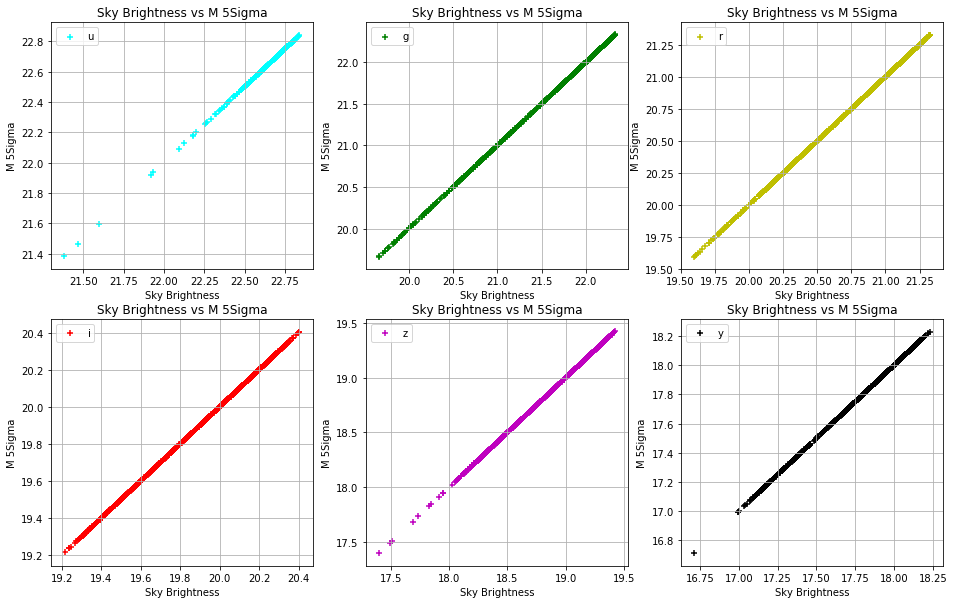

In [26]:
fig=plt.figure(figsize=(16,10))

isubplot=[231,232,233,234,235,236]
ifilt=0

for ifilt in np.arange(Nfilt):
    ax=fig.add_subplot(isubplot[ifilt])
    bundlename1 = all_bundlename1[ifilt]
    bundlename2 = all_bundlename2[ifilt]
   
    ax.scatter(bundles[bundlename1].metricValues,bundles[bundlename1].metricValues,marker='+',color=colors[filters[ifilt]] ,label=filters[ifilt])
    
    ax.legend()
    ax.set_title("Sky Brightness vs M 5Sigma")
    ax.grid()
    ax.set_xlabel("Sky Brightness")
    ax.set_ylabel("M 5Sigma")

